# NASA Data Analysis
## Imports
First, we must import the necessary packages.

In [20]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

## Getting the Data

In [2]:
url = "https://raw.githubusercontent.com/ezwendel/cs556final/main/NASA.csv"
data = pd.read_csv(url)
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


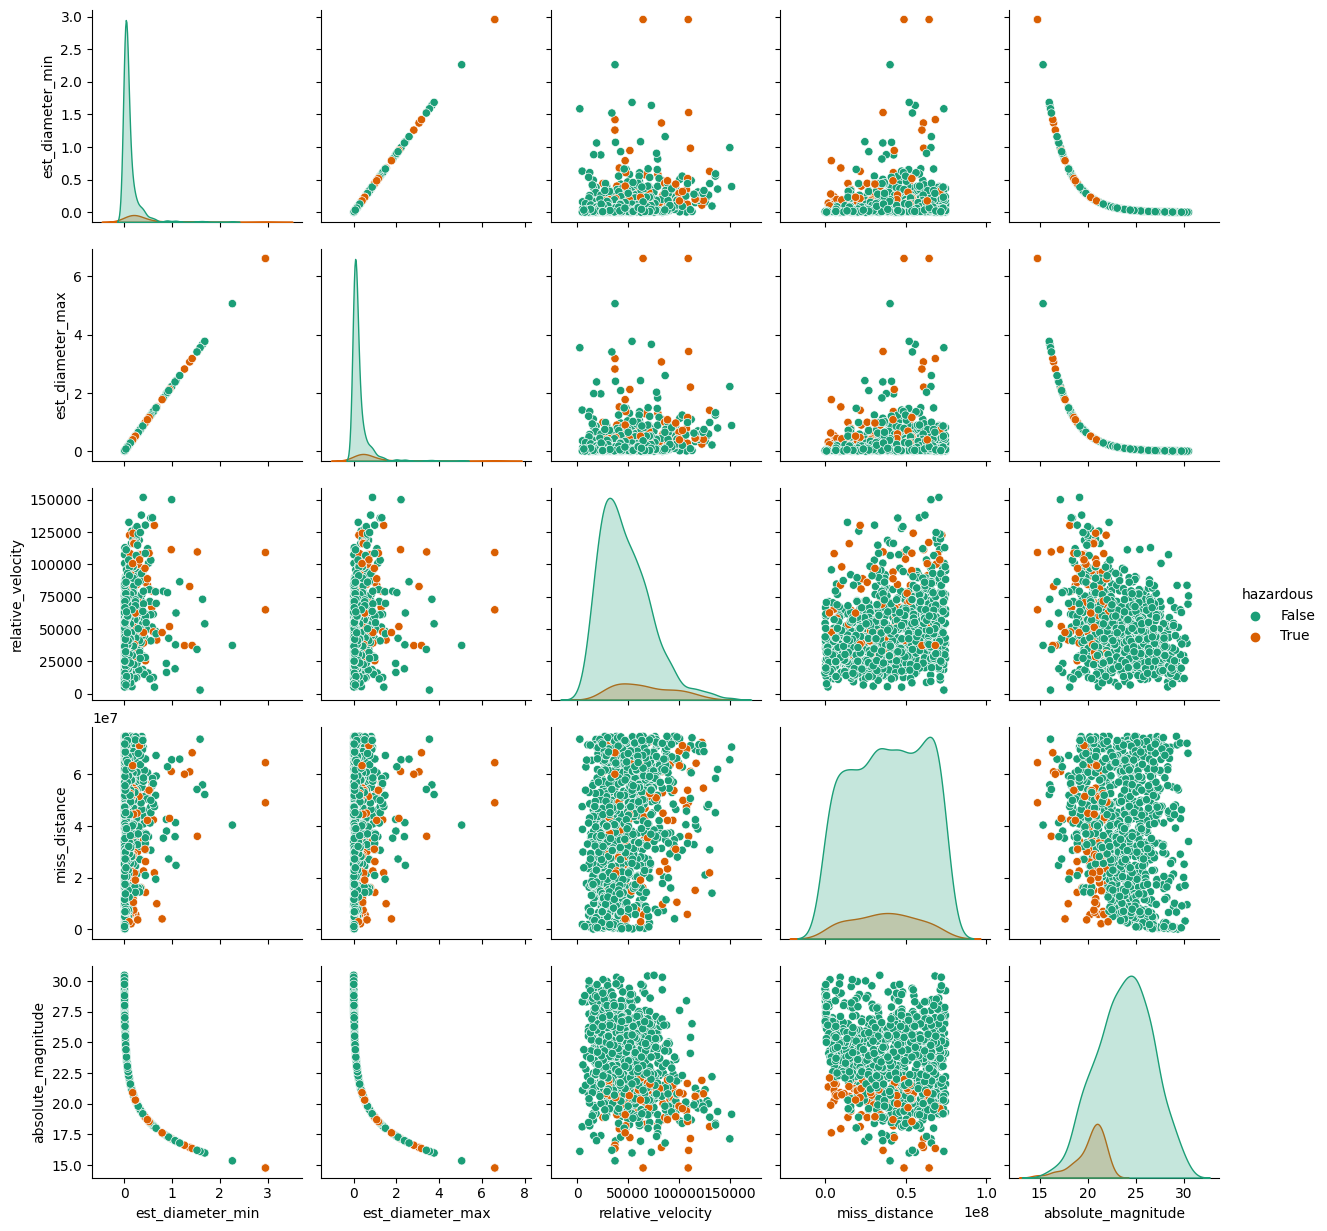

In [3]:
data_to_compare = data.drop(["id", "name", "orbiting_body", "sentry_object"], axis=1)
sns.pairplot(data_to_compare.sample(1000),hue='hazardous',palette='Dark2')

## Cleaning the Data

In [4]:
# data.orbiting_body.unique()
# data.sentry_object.unique()

In [5]:
X = data.loc[:, ["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "miss_distance"]]
Y = data.loc[:, ["hazardous"]]

# Y["hazardous"].replace({False: 0}, inplace=True)
# Y["hazardous"].replace({True: 1}, inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

In [6]:
clf = LocalOutlierFactor(n_neighbors=20)
labels = clf.fit_predict(X)
negative_outlier_factor = clf.negative_outlier_factor_

In [7]:
num_normal_things = len(list(filter(lambda row : row == 1, labels)))

num_normal_things

88678

In [8]:
data["Outlier"] = labels
data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,Outlier
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,1
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,1
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,1
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,1
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,1
...,...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False,1
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False,1
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False,1
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False,1


In [9]:
filtered_data = data[data.Outlier == 1]
outlier_data = data[data.Outlier != 1]

In [10]:
# outlier_data
# negative_outlier_factor[23]

In [35]:
X = filtered_data.loc[:, ["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "absolute_magnitude"]]
Y = filtered_data.loc[:, ["hazardous"]]

# scaler = MinMaxScaler()
# scaler.fit(X)
# # print(scaler.transform(X))

X_norm = normalize(X)

# Y["hazardous"].replace({False: 0}, inplace=True)
# Y["hazardous"].replace({True: 1}, inplace=True)

pca = PCA(n_components=2)
pca.fit(X_norm)
X_pca = pca.transform(X_norm)


X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2) 

In [36]:
pca.singular_values_

array([11.65741361,  2.36103613])

In [37]:
svc_model = SVC()
svc_model.fit(X_train,Y_train.values.ravel())

SVC()

In [38]:
Y_pred = svc_model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(confusion_matrix(Y_test.values.ravel(),Y_pred))

[[16056     0]
 [ 1680     0]]


In [41]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

       False       0.91      1.00      0.95     16056
        True       0.00      0.00      0.00      1680

    accuracy                           0.91     17736
   macro avg       0.45      0.50      0.48     17736
weighted avg       0.82      0.91      0.86     17736



C:\Users\elijah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elijah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elijah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera